In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before anything we add a name for each column to make them meaningful and easy to use.

In [2]:
data = pd.read_csv('train_data.csv')
data

,Sentence,Emotion
0,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
1,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
2,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
3,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
4,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
...,...,...
4919,من از بو و ماندگاریش راضی بودم ، قیمتش هم‌ مناسبه,HAPPY
4920,گاز نداریم آب نداریم برق نداریم نت نداریم پول ...,SAD
4921,یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...,SAD
4922,زیادی داریم به قضیه ی گاز میپردازیم فقط فراخوا...,OTHER


In [3]:
data.shape

(4924, 2)

In [4]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

<AxesSubplot: >

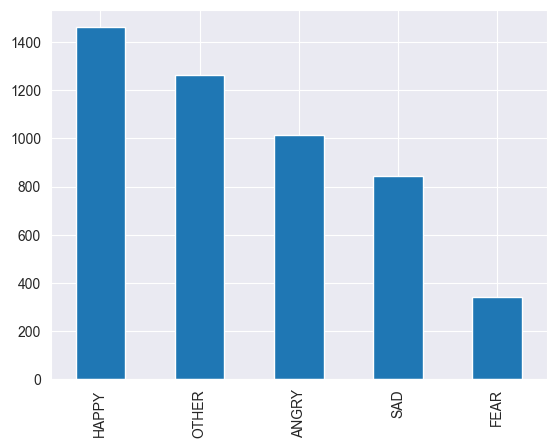

In [5]:
plot_df = data.Emotion.value_counts()
plot_df.plot(kind="bar")

In [6]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'♥', '’', '[', 'ش', '_', '“', '٦', '⚽', 'Y', 'آ', '*', '3', 'y', 'ة', '°', '=', 'ق', '.', 'I', 'K', 'ۀ', 'z', 'c', 'H', 'R', '✋', '۹', 'ژ', '۲', 'ج', 'S', 'ِ', '/', 'ʏ', '^', 'گ', 'P', 'Q', '✨', 'g', '&', 'ᴏ', 'چ', 'س', '۱', '0', 'ـ', 'A', '♂', 'و', 'غ', '️', ']', '☠', 'د', 'w', 'h', 'F', '❤', 'ؤ', ' ', 'u', 'k', 'n', '#', '‐', '”', '8', 'ر', 'ئ', '9', 'd', '?', 'ف', '؟', '✍', 'p', 'V', 'ا', '☄', '۳', 'ع', 'خ', '6', '۰', 't', '\n', 'م', 'ى', 'E', '⃟', 'ي', '۸', 'ّ', 'x', '☺', '4', 'O', '⁉', 'ز', '⭕', '!', '☘', '⭐', 'ی', 'ط', 'N', '⚘', 'ُ', '۴', 'j', 'D', '+', 'Z', 'َ', 'ᴛ', ',', 'B', 'ً', 'a', 'l', 'ᴇ', 'e', 'M', 'U', '…', 'v', 'm', '|', '\u200c', '⛓', '¹', 'ه', '؛', '%', '•', '\u2066', '١', 'T', '٣', '♀', '⊰', 'b', '(', '✌', 'ْ', 'ټ', '‘', '۶', '7', ')', ';', 'ہ', '\u200d', '5', 'ت', 'ە', '٪', 'J', 'ء', ':', 'ص', 'ل', '۷', '\u2067', '٠', '٫', '٢', '✅', '❄', '2', '»', 'o', '}', 'ھ', 'L', 'f', 'ٔ', '1', 'W', '☹', 'پ', '☝', 'i', 'G', 'ح', '۔', '،', 'r', '۵', 'ے', '~', '\u2069', 'ك',

As we can see there are capital and small letter. Also, there are three kind of 'ی' for only one char and there are persian and english numbers. We have to handle all of them.

In [7]:
data['Sentence'] = data['Sentence'].str.lower()
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

185
{'♥', '’', '[', 'ش', '_', '“', '٦', '⚽', 'آ', '*', '3', 'y', 'ة', '°', '=', 'ق', '.', 'ۀ', 'z', 'c', '✋', '۹', 'ژ', '۲', 'ج', 'ِ', '/', 'ʏ', '^', 'گ', '✨', 'g', '&', 'ᴏ', 'چ', 'س', '۱', '0', 'ـ', '♂', 'و', 'غ', '️', ']', '☠', 'د', 'w', 'h', '❤', 'ؤ', ' ', 'u', 'k', 'n', '#', '‐', '”', '8', 'ر', 'ئ', '9', 'd', '?', 'ف', '؟', '✍', 'p', '☄', 'ا', '۳', 'ع', 'خ', '6', '۰', 't', '\n', 'م', 'ى', '⃟', 'ي', '۸', 'ّ', 'x', '☺', '4', '⁉', 'ز', '⭕', '!', '☘', '⭐', 'ی', 'ط', '⚘', 'ُ', '۴', 'j', '+', 'َ', 'ᴛ', ',', 'ً', 'a', 'l', 'ᴇ', 'e', '|', '…', 'v', 'm', '¹', '\u200c', '⛓', 'ه', '؛', '%', '•', '\u2066', '١', '٣', '♀', '⊰', 'b', '(', '✌', 'ْ', 'ټ', '‘', '۶', '7', ')', ';', 'ہ', '\u200d', '5', 'ت', 'ە', '٪', 'ء', ':', 'ص', 'ل', '۷', '\u2067', '٠', '٫', '٢', '✅', '❄', '2', '»', 'o', '}', 'ھ', 'f', 'ٔ', '1', '☹', 'پ', '☝', 'i', 'ح', '۔', '،', 'r', '۵', 'ے', '~', '\u2069', 'ك', 's', 'ب', '-', 'ض', 'ک', 'ن', '٬', 'ذ', '²', 'ɴ', 'q', 'ث', 'أ', '«', 'ظ'}


In [8]:
def convert_persian_to_english(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

# Apply the function to the 'text' column
data['Sentence'] = data['Sentence'].apply(convert_persian_to_english)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

174
{'♥', '’', '[', 'ش', '_', '“', '⚽', 'آ', '*', '3', 'y', 'ة', '°', '=', 'ق', '.', 'ۀ', 'z', 'c', '✋', 'ژ', 'ج', 'ِ', '/', 'ʏ', '^', 'گ', '✨', 'g', '&', 'ᴏ', 'چ', 'س', '0', 'ـ', '♂', 'و', 'غ', '️', ']', '☠', 'د', 'w', 'h', '❤', 'ؤ', ' ', 'u', 'k', 'n', '#', '‐', '8', '”', 'ر', 'ئ', '9', 'd', '?', 'ف', '؟', '✍', 'p', '☄', 'ا', 'ع', 'خ', '6', 't', '\n', 'م', 'ى', '⃟', 'ي', 'x', 'ّ', '⁉', '☺', '4', 'ز', '⭕', '!', '☘', '⭐', 'ی', 'ط', '⚘', 'ُ', 'j', '+', 'َ', 'ᴛ', ',', 'ً', 'a', 'l', 'ᴇ', 'e', '|', '…', 'v', 'm', '¹', '\u200c', '⛓', 'ه', '؛', '%', '•', '\u2066', '١', '٣', '♀', '⊰', 'b', '(', '✌', 'ْ', 'ټ', '‘', '7', ')', ';', 'ہ', '\u200d', '5', 'ت', 'ە', '٪', 'ء', ':', 'ص', 'ل', '\u2067', '٠', '٫', '٢', '✅', '❄', '2', '»', 'o', '}', 'ھ', 'f', 'ٔ', '1', '☹', 'پ', '☝', 'i', 'ح', '۔', '،', 'r', 'ے', '~', '\u2069', 'ك', 's', 'ب', '-', 'ض', 'ک', 'ن', '٬', 'ذ', '²', 'ɴ', 'q', 'ث', 'أ', '«', 'ظ'}


Now we handle the numbers and upper cases.

In [9]:
def normalize_yeh(text):
    # The three types of "ی" in Persian: ی, ي, ے, ئ
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']
    # Convert all types of "ی" to the standard "ی"
    for char in yeh_characters:
        text = text.replace(char, 'ی')
    return text

# Apply the normalization function to the 'text' column
data['Sentence'] = data['Sentence'].apply(normalize_yeh)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

170
{'♥', '’', '[', 'ش', '_', '“', '⚽', 'آ', '*', '3', 'y', 'ة', '°', '=', 'ق', '.', 'ۀ', 'z', 'c', '✋', 'ژ', 'ج', 'ِ', '/', 'ʏ', '^', 'گ', '✨', 'g', '&', 'ᴏ', 'چ', 'س', '0', 'ـ', '♂', 'و', 'غ', '️', ']', '☠', 'د', 'w', 'h', '❤', 'ؤ', ' ', 'u', 'k', 'n', '#', '‐', '8', '”', 'ر', '9', 'd', '?', 'ف', '؟', '✍', 'p', '☄', 'ا', 'ع', 'خ', '6', 't', '\n', 'م', '⃟', 'x', '⁉', 'ّ', '☺', '4', 'ز', '⭕', '!', '☘', '⭐', 'ی', 'ط', '⚘', 'ُ', 'j', '+', 'َ', 'ᴛ', ',', 'ً', 'a', 'l', 'ᴇ', 'e', '|', '…', 'v', 'm', '¹', '\u200c', '⛓', 'ه', '؛', '%', '•', '\u2066', '١', '٣', '♀', '⊰', 'b', '(', '✌', 'ْ', 'ټ', '‘', '7', ')', ';', 'ہ', '\u200d', '5', 'ت', 'ە', '٪', 'ء', ':', 'ص', 'ل', '\u2067', '٠', '٫', '٢', '✅', '❄', '2', '»', 'o', '}', 'ھ', 'f', 'ٔ', '1', '☹', 'پ', '☝', 'i', 'ح', '۔', '،', 'r', '~', '\u2069', 'ك', 's', 'ب', '-', 'ض', 'ک', 'ن', '٬', 'ذ', '²', 'ɴ', 'q', 'ث', 'أ', '«', 'ظ'}


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.61
F1-score: 0.61


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.58
F1-score: 0.57


In [12]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.62
F1-score: 0.63


In [13]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = KNeighborsClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.55
F1-score: 0.54


In [14]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = XGBClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.59
F1-score: 0.59


By cross validation approach

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the XGBoost model using cross-validation
model = XGBClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Average Accuracy: 0.59
Average F1-score: 0.59


In [16]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the XGBoost model using cross-validation
model = SVC(kernel = 'rbf', random_state = 0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Average Accuracy: 0.60
Average F1-score: 0.59


In [17]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the XGBoost model using cross-validation
model = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Average Accuracy: 0.54
Average F1-score: 0.53


In [18]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the XGBoost model using cross-validation
model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Average Accuracy: 0.58
Average F1-score: 0.57


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the XGBoost model using cross-validation
model = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_tfidf, df['emotion']):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

print(f'Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
print(f'Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Average Accuracy: 0.61
Average F1-score: 0.61


In [20]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from lightgbm import LGBMClassifier

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Train the tree-based models using cross-validation
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='gini'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Tree': ExtraTreesClassifier(),
    'LightGBM': LGBMClassifier()
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    accuracy_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X_tfidf, df['emotion']):
        X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
        y_train, y_test = df['emotion'].iloc[train_index], df['emotion'].iloc[test_index]

        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    print(f'{model_name} - Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')
    print(f'{model_name} - Average F1-score: {sum(f1_scores) / len(f1_scores):.2f}')


Decision Tree - Average Accuracy: 0.53
Decision Tree - Average F1-score: 0.53
Random Forest - Average Accuracy: 0.59
Random Forest - Average F1-score: 0.58
Gradient Boosting - Average Accuracy: 0.58
Gradient Boosting - Average F1-score: 0.58
XGBoost - Average Accuracy: 0.59
XGBoost - Average F1-score: 0.59
AdaBoost - Average Accuracy: 0.47
AdaBoost - Average F1-score: 0.45
Extra Tree - Average Accuracy: 0.61
Extra Tree - Average F1-score: 0.60
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7474
[LightGBM] [Info] Number of data points in the train set: 3939, number of used features: 317
[LightGBM] [Info] Start training from score -1.582883
[LightGBM] [Info] Start training from score -2.665554
[LightGBM] [Info] Start training from score -1.213923
[LightGBM] [Info] Start training from score -1.360977
[LightGBM] [Info] Start training from score -1.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from lightgbm import LGBMClassifier

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Sentence'])

# Define the hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, None]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15, None]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.2, 0.3]},
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]},
    'Extra Tree': {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy']},
    'LightGBM': {'num_leaves': [31, 63, 127], 'learning_rate': [0.1, 0.2, 0.3]}
}

# Train the tree-based models using cross-validation with hyperparameter optimization
for model_name, model_class in [
    ('Decision Tree', DecisionTreeClassifier),
    ('Random Forest', RandomForestClassifier),
    ('Gradient Boosting', GradientBoostingClassifier),
    ('XGBoost', XGBClassifier),
    ('AdaBoost', AdaBoostClassifier),
    ('Extra Tree', ExtraTreesClassifier),
    ('LightGBM', LGBMClassifier)
]:
    print(f'Optimizing {model_name} model...')
    model = model_class()
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=['accuracy', 'f1_weighted'], refit='accuracy')
    grid_search.fit(X_tfidf, df['emotion'])

    #print(f'{model_name} - Best Accuracy: {grid_search.best_score_["accuracy"]:.2f}')
    #print(f'{model_name} - Best F1-score: {grid_search.best_score_["f1_weighted"]:.2f}')
    print(f'{model_name} - Best Hyperparameters: {grid_search.best_params_}')


Optimizing Decision Tree model...
Decision Tree - Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}
Optimizing Random Forest model...
Random Forest - Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Optimizing Gradient Boosting model...


KeyboardInterrupt: 